In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.gridspec as gridspec
import missingno as msno

In [2]:
#Load in data to dataframe
df = pd.read_csv('datasets_4458_8204_winequality-red.csv')
#Initial inspection of data to get an idea of how the data is formatted and what information is available
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


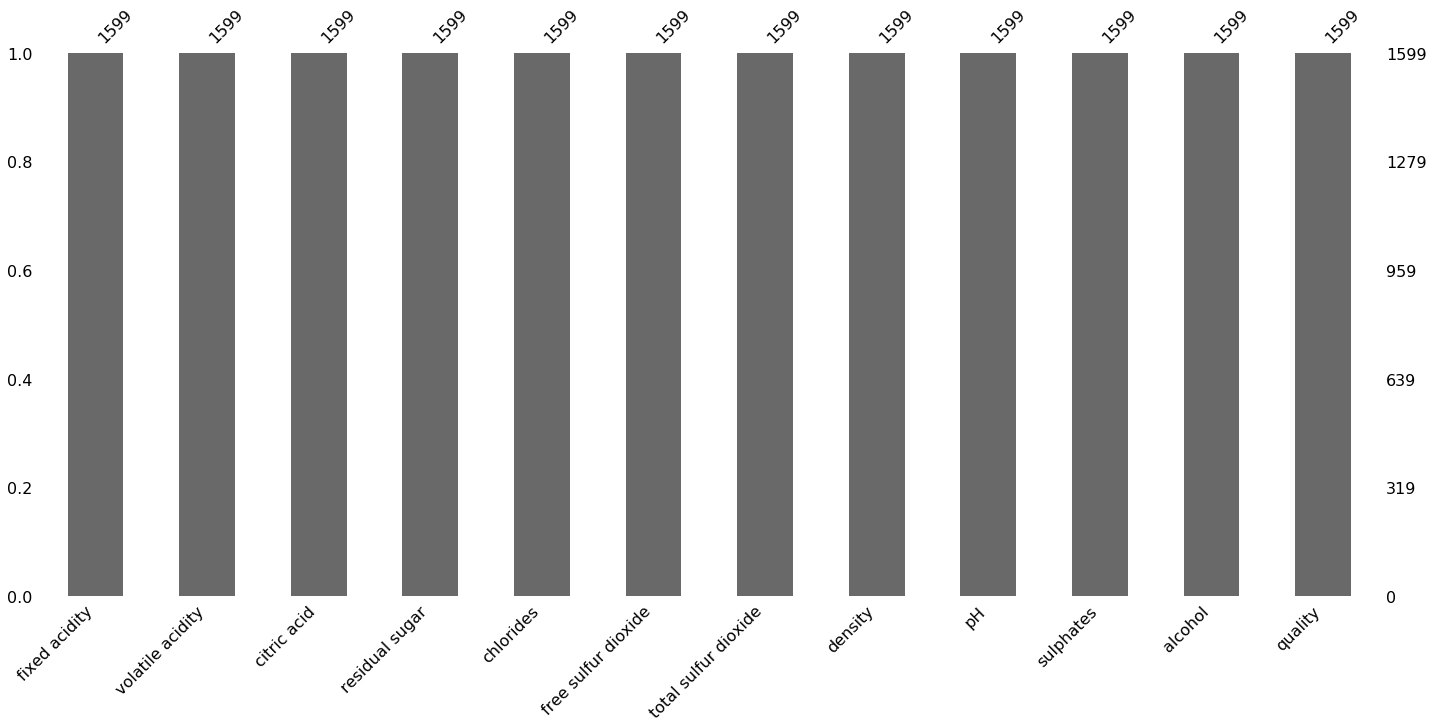

In [3]:
#Check for missing values
msno.bar(df)
#No missing values, very lucky!

In [4]:
#Investigate data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The dataset looks like very clean already, so no cleansing is required at this stage. So the only manipulation required is removing the target variable from the independent variables.

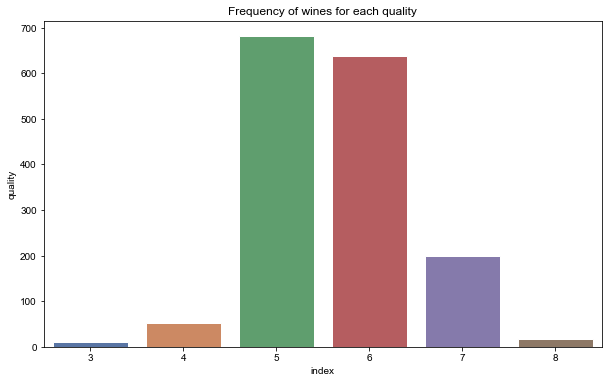

In [41]:
quality_counts = df['quality'].value_counts().reset_index()
fig, ax = plt.subplots(figsize = (10, 6))
sns.set(style="whitegrid")
plt.title("Frequency of wines for each quality")
sns.barplot(x=quality_counts['index'], y=quality_counts['quality'])

In [44]:
quality_counts.sort_values(by=['index'])

,index,quality
5,3,10
3,4,53
0,5,681
1,6,638
2,7,199
4,8,18


Due to the low number of values at the extreme values of quality, it seems prudent to group the qualities together to try to classify as good and bad. The split will for good wine will be 7 and above and bad will be 6 and lower.

In [5]:
#Split dependent and indepent variables into separate dataframes
x = df.drop('quality', axis=1)
y = df['quality'].reset_index()

#Categorising wine quality into "good" and "bad"
y['labels'] = y.apply(lambda x: "good" if x.quality >= 7 else "bad", axis=1)
y['label_binary'] = y.apply(lambda x: 0 if x.labels == 'bad' else 1, axis=1)

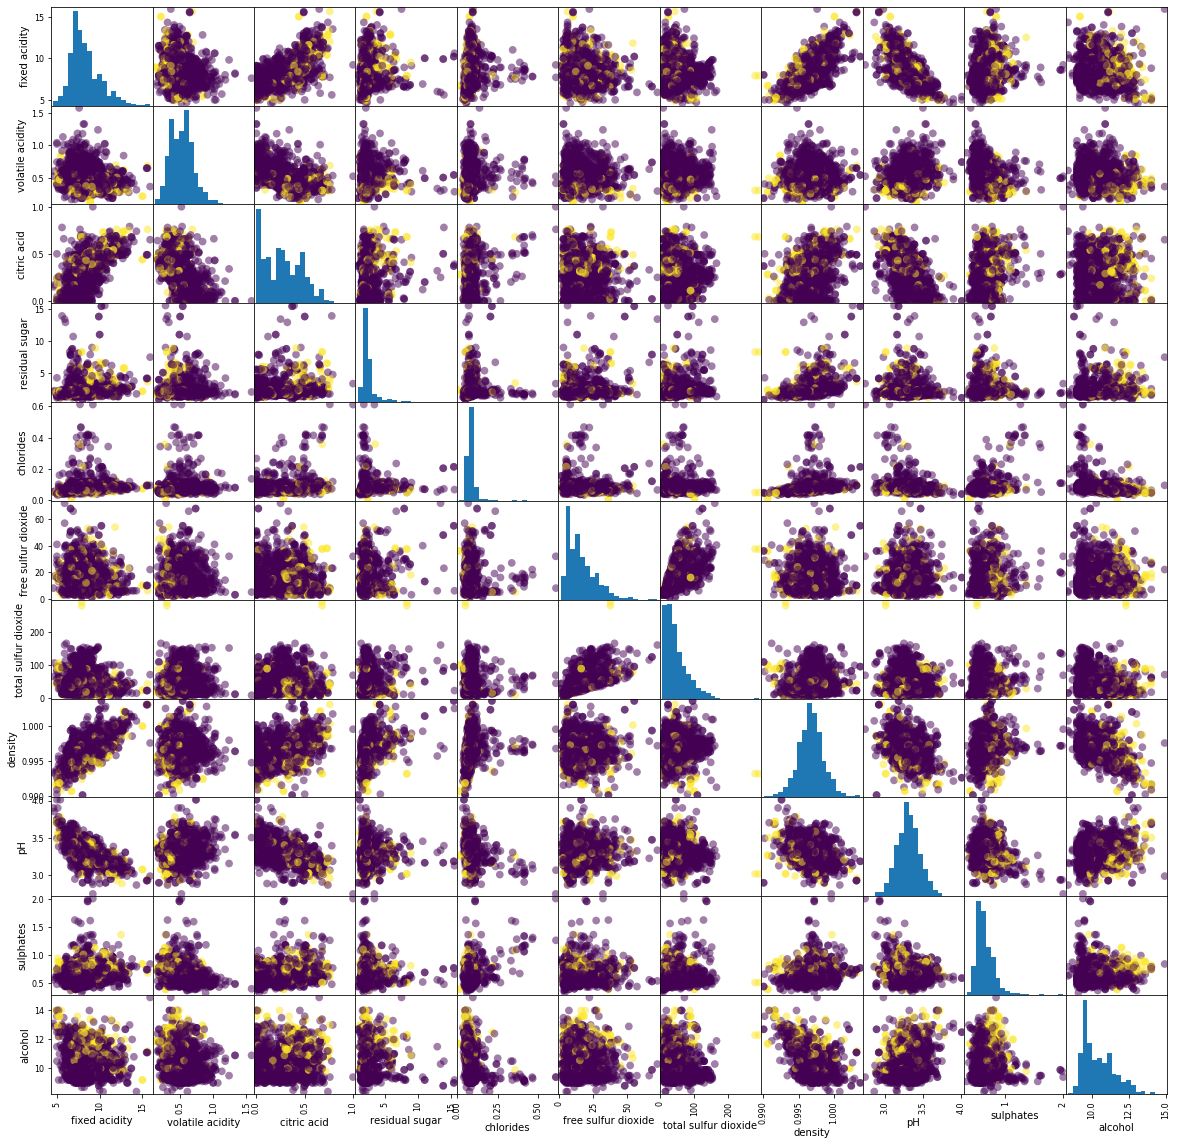

In [14]:
#Create pairwise sccatter plots and histograms to investigate the features
pd.plotting.scatter_matrix(x, c=y['label_binary'], figsize=(20,20), marker='o', hist_kwds={'bins': 20}, s=60, 
                           alpha=0.5)
plt.show()

In the above plots we can see 

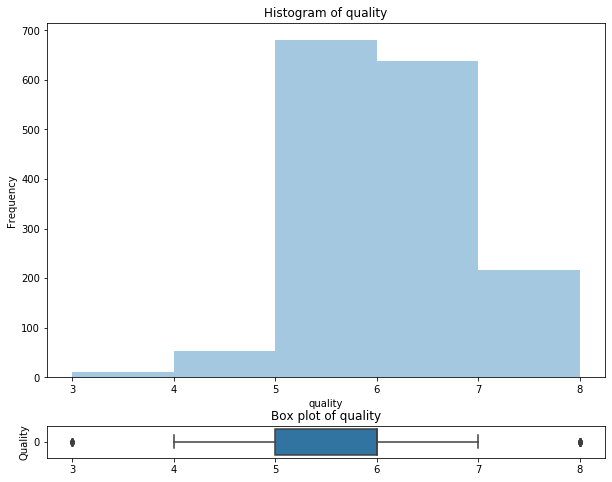

In [9]:
#Check whether distrobution of quality is normal to satisfy linear regression assumptions
#create figure
figure = plt.figure(figsize=(10,8))
figure.subplots_adjust(hspace=1.5)

gs = figure.add_gridspec(6,6)
#Create histogram of quality
ax1 = figure.add_subplot(gs[0:5, :])
ax1.set_title("Histogram of quality")
ax1.set_ylabel("Frequency")
sns.distplot(y['quality'], bins=5, kde=False)

#create boxplot of quality
ax2 = figure.add_subplot(gs[5, :])
ax2.set_title("Box plot of quality")
ax2.set_ylabel("Quality")
sns.boxplot(data=y.quality, orient='h')

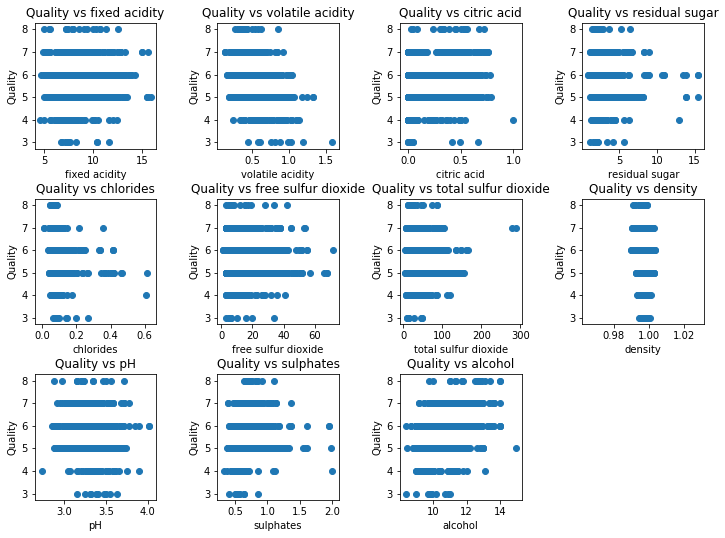

In [10]:
#Quality appears to be normally distributed
#Investigate relationships between independent variables and dependent variable
#Plot scatter graphs of each independent variable against quality to gain visual representation of correlation of each
fig2 = plt.figure(figsize=(12,12))
fig2.subplots_adjust(hspace=0.4, wspace=0.5)
for i, variable in enumerate(x):
    ax = plt.subplot(4,4,i+1)
    ax.set_title(f"Quality vs {variable}")
    ax.set_ylabel("Quality")
    ax.set_xlabel(str(variable))
    plt.scatter(x[variable], y.quality)


Scatter plots are not the ideal way to visualise relationships between the categorical dependent variable and the independent variables. However there does seem to be some correlation with the target variable and some of the independent variables.

There appears to be some outliers in some of the plots. I will leave them in for now and return to the plots once I have determined which independent variables exhibit useful predictive power.

In [11]:
#List the variables exhibiting the strongest correlation with quality
correlation_against_quality = df.corr().iloc[df.corr().abs()['quality'].argsort()[::-1]]['quality']
print(correlation_against_quality)


quality                 1.000000
alcohol                 0.476166
volatile acidity       -0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
fixed acidity           0.124052
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
Name: quality, dtype: float64


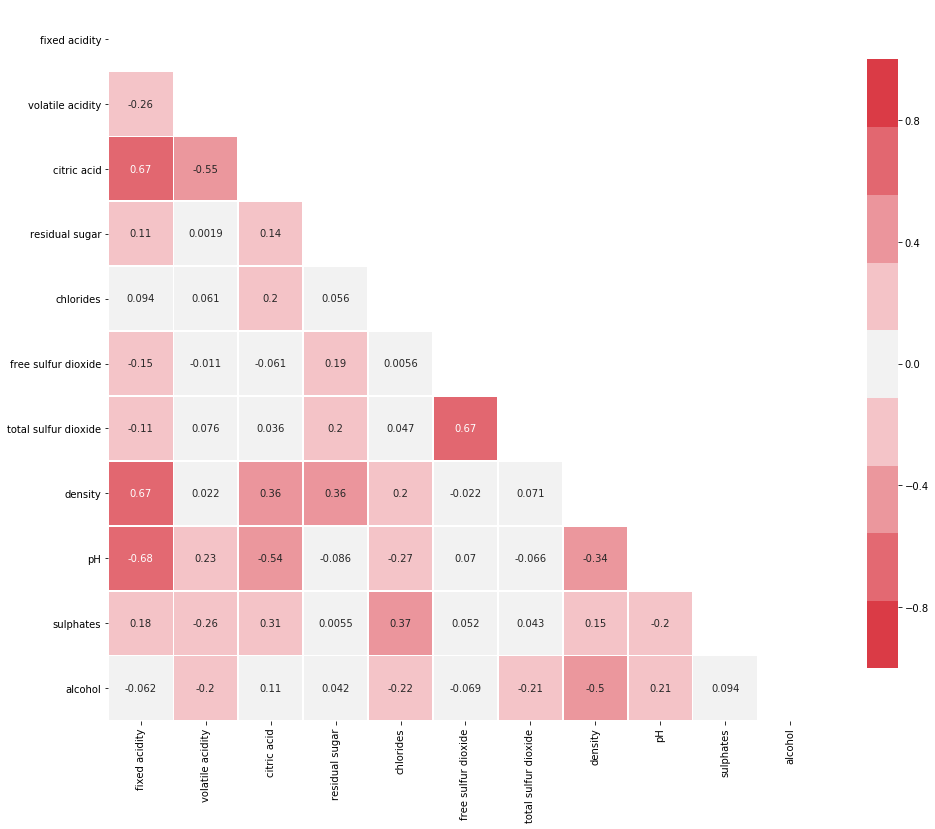

In [12]:
#Create heatmap of correlations between all independent variables to check for multicollinearity
plt.figure(figsize=(16, 16))
cmap = sns.diverging_palette(10, 10, n=9)
mask = np.zeros_like(x.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(x.corr(), square=True, cmap=cmap, vmin =-1, vmax=1, linewidths=.5, cbar_kws={"shrink": .7}, mask=mask, annot=True)

There is some correlation between the independent variables but not enough to indicate there will be a problem with multicollinearity. 

With high collinearity the coefficients of the offending independent variables will become unreliable. 

However the predictions, will still be valid.


In [13]:
%store x
%store y

Stored 'x' (DataFrame)
Stored 'y' (DataFrame)
